# Food Nutrition

Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: JAN 19 2025

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler  # Add this import


from sklearn.metrics import accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

In [6]:
df1 = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Food Nutrition/FOOD-DATA-GROUP1.csv")
df2 = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Food Nutrition/FOOD-DATA-GROUP2.csv")
df3 = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Food Nutrition/FOOD-DATA-GROUP3.csv")
df4 = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Food Nutrition/FOOD-DATA-GROUP4.csv")
df5 = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Food Nutrition/FOOD-DATA-GROUP5.csv")


In [8]:
data = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [10]:
data.shape

(2395, 37)

In [12]:
data.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
food                    0
Caloric Value           0
Fat                     0
Saturated Fats          0
Monounsaturated Fats    0
Polyunsaturated Fats    0
Carbohydrates           0
Sugars                  0
Protein                 0
Dietary Fiber           0
Cholesterol             0
Sodium                  0
Water                   0
Vitamin A               0
Vitamin B1              0
Vitamin B11             0
Vitamin B12             0
Vitamin B2              0
Vitamin B3              0
Vitamin B5              0
Vitamin B6              0
Vitamin C               0
Vitamin D               0
Vitamin E               0
Vitamin K               0
Calcium                 0
Copper                  0
Iron                    0
Magnesium               0
Manganese               0
Phosphorus              0
Potassium               0
Selenium                0
Zinc                    0
Nutrition Density       0
dtype: int64

In [14]:
data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)

In [16]:
data.head(3)

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.0,2.9,1.3,0.2,0.8,0.5,0.9,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.07
1,neufchatel cheese,215,19.4,10.9,4.9,0.8,3.1,2.7,7.8,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.10
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.0,0.9,3.4,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.40


In [22]:
data.shape[0] - data["food"].nunique()

0

In [26]:
data.duplicated().sum()

0

In [28]:
data[data["food"] == "nectarine"]

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
870,nectarine,66,0.5,0.066,0.1,0.2,15.8,11.8,1.6,2.6,...,0.081,9.0,0.1,0.4,13.5,0.002,39.0,301.5,0.0,20.735


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  2395 non-null   object 
 1   Caloric Value         2395 non-null   int64  
 2   Fat                   2395 non-null   float64
 3   Saturated Fats        2395 non-null   float64
 4   Monounsaturated Fats  2395 non-null   float64
 5   Polyunsaturated Fats  2395 non-null   float64
 6   Carbohydrates         2395 non-null   float64
 7   Sugars                2395 non-null   float64
 8   Protein               2395 non-null   float64
 9   Dietary Fiber         2395 non-null   float64
 10  Cholesterol           2395 non-null   float64
 11  Sodium                2395 non-null   float64
 12  Water                 2395 non-null   float64
 13  Vitamin A             2395 non-null   float64
 14  Vitamin B1            2395 non-null   float64
 15  Vitamin B11          

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Caloric Value,2395.0,223.769520,384.728244,0.0,44.5000,117.000,258.0000,6077.0
Fat,2395.0,10.176276,29.008915,0.0,0.3000,2.100,9.4000,550.7
Saturated Fats,2395.0,3.924917,19.502262,0.0,0.0640,0.500,2.7000,672.0
Monounsaturated Fats,2395.0,4.133622,12.939587,0.0,0.0580,0.500,3.4000,291.1
Polyunsaturated Fats,2395.0,2.152844,7.145738,0.0,0.0710,0.400,1.7000,188.0
Carbohydrates,2395.0,18.589021,29.406134,0.0,0.5000,6.800,25.0500,390.2
Sugars,2395.0,4.457459,13.339929,0.0,0.0000,0.086,3.2000,291.5
Protein,2395.0,13.400777,32.294246,0.0,0.8000,3.500,13.3000,560.3
Dietary Fiber,2395.0,2.235790,5.404483,0.0,0.0000,0.200,2.2000,76.5
Cholesterol,2395.0,62.171937,385.352876,0.0,0.0000,0.000,26.4500,10509.0


## Exploratory Analysis And Visualization

In [37]:
columns_to_plot = data.columns.to_list()

In [39]:
columns_to_plot.remove("food")

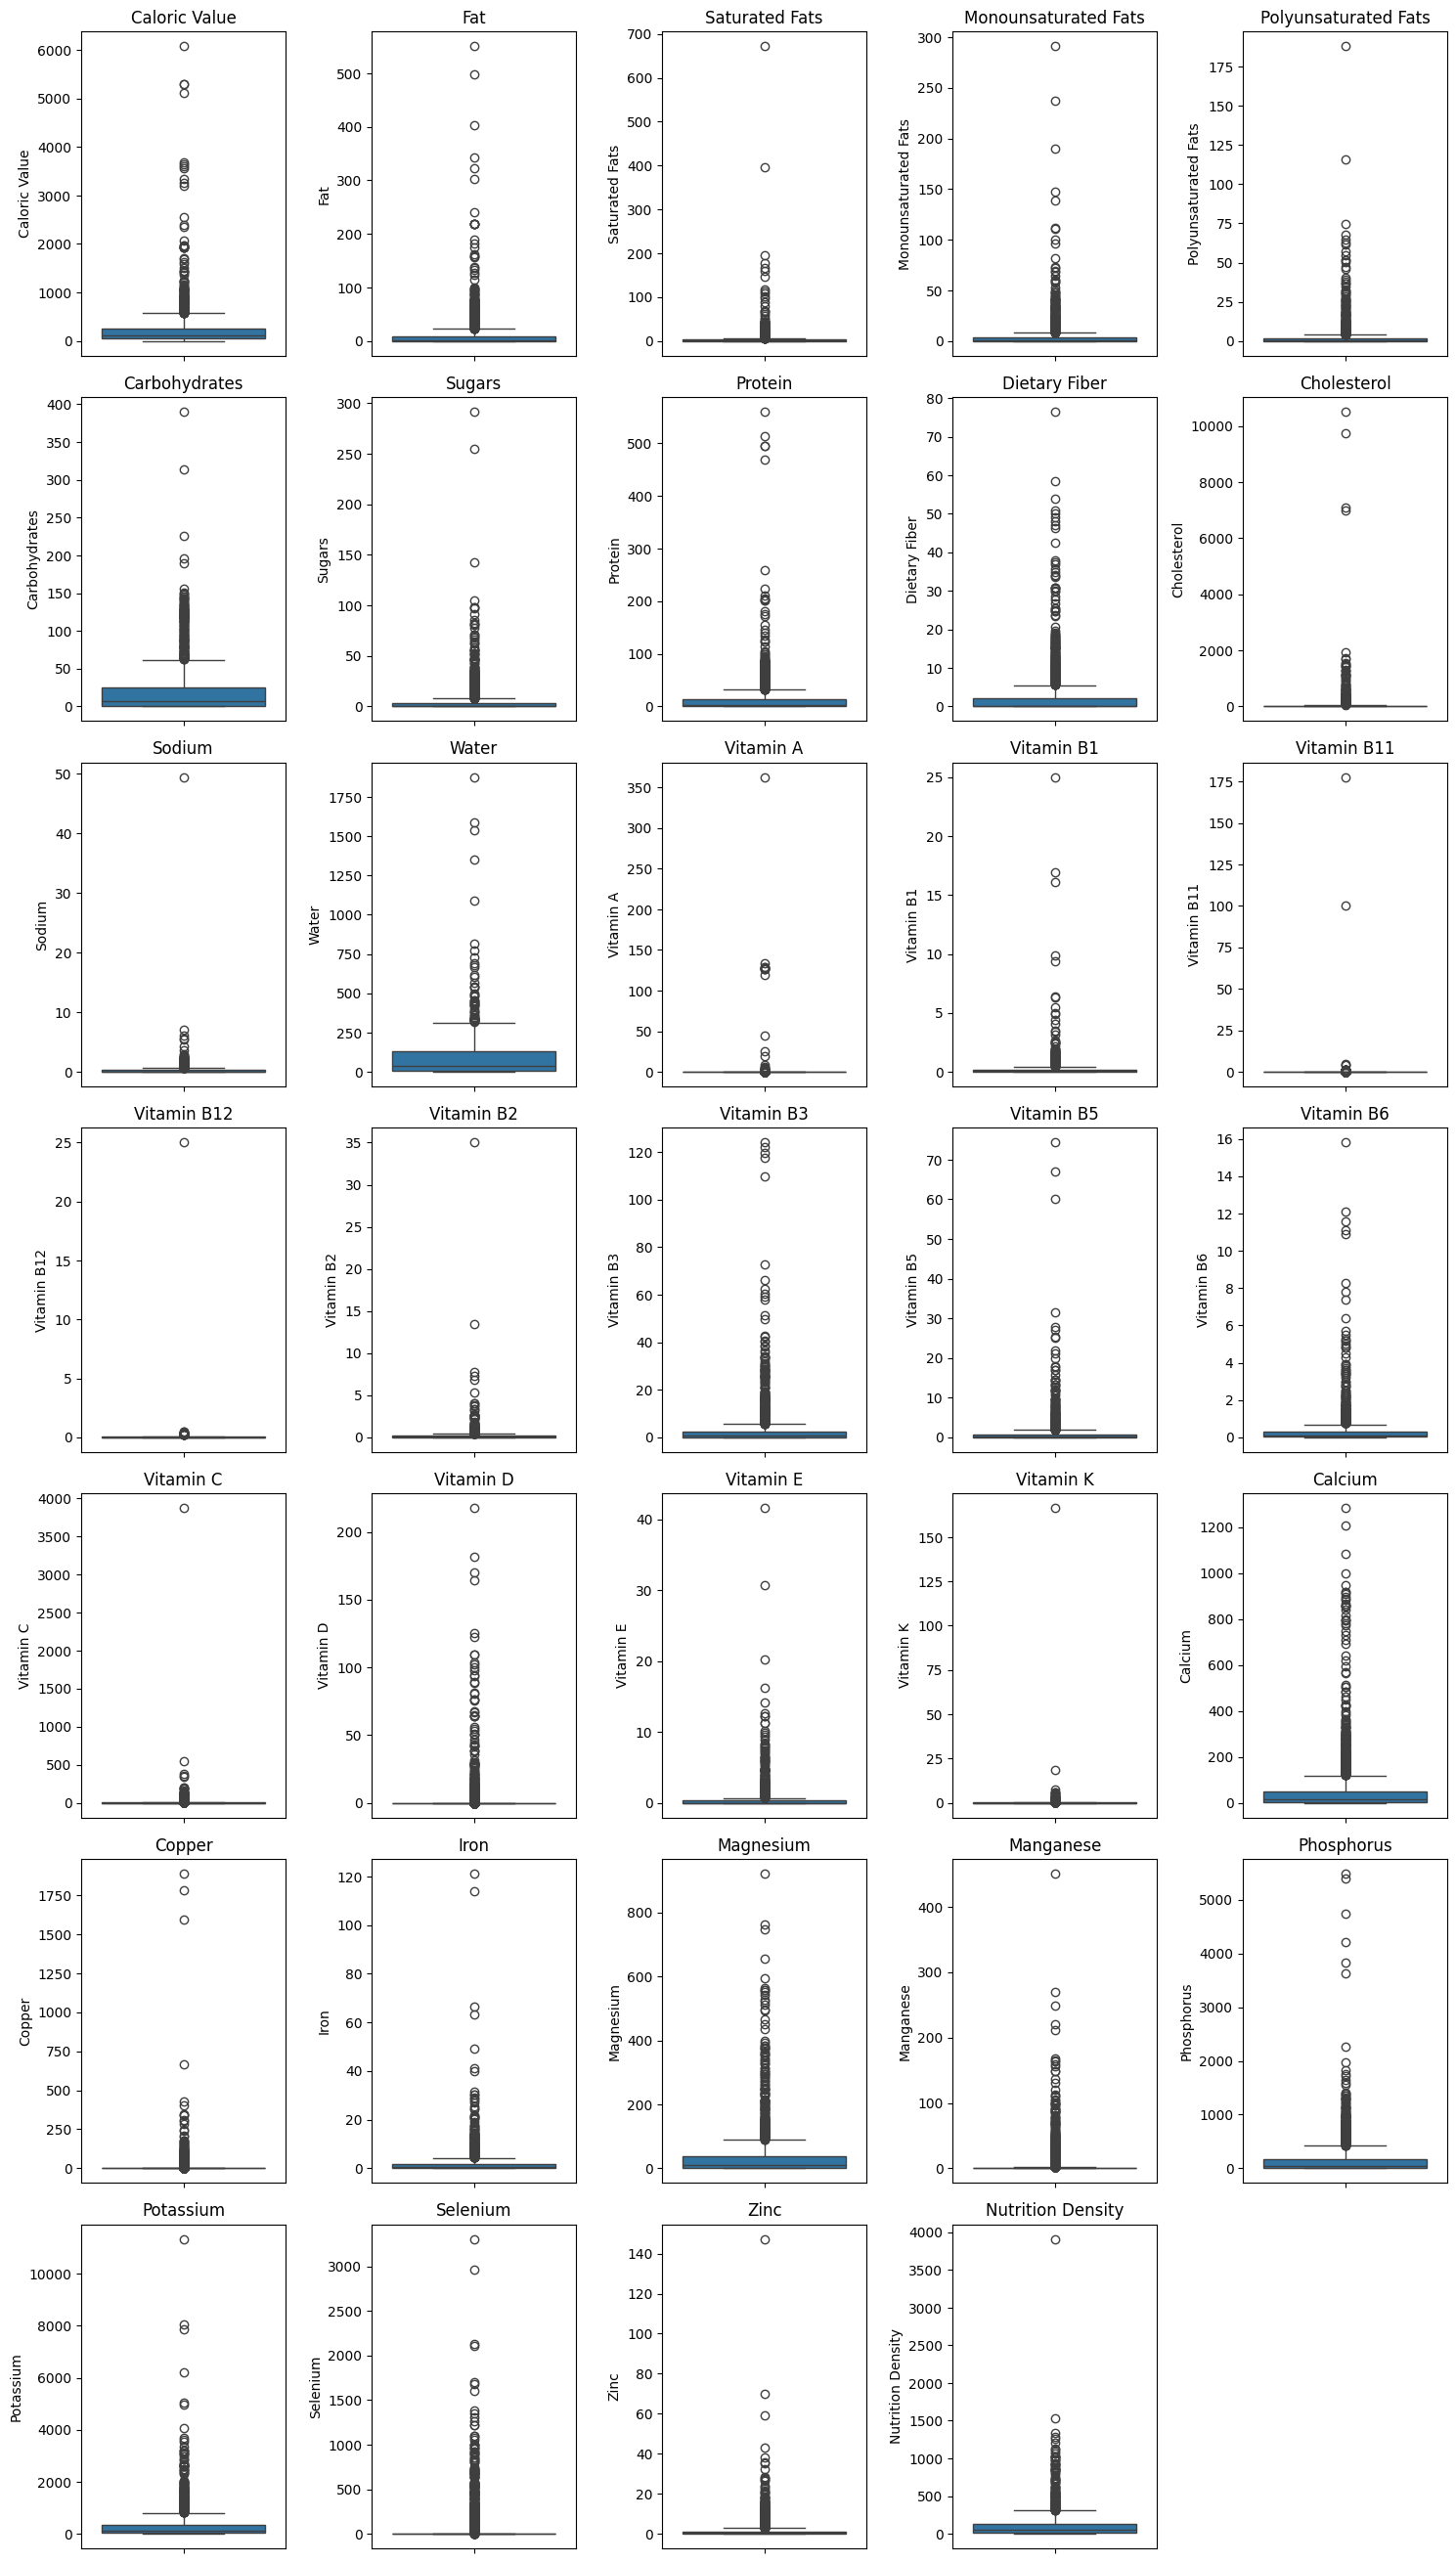

In [43]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(8, 5, i)
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

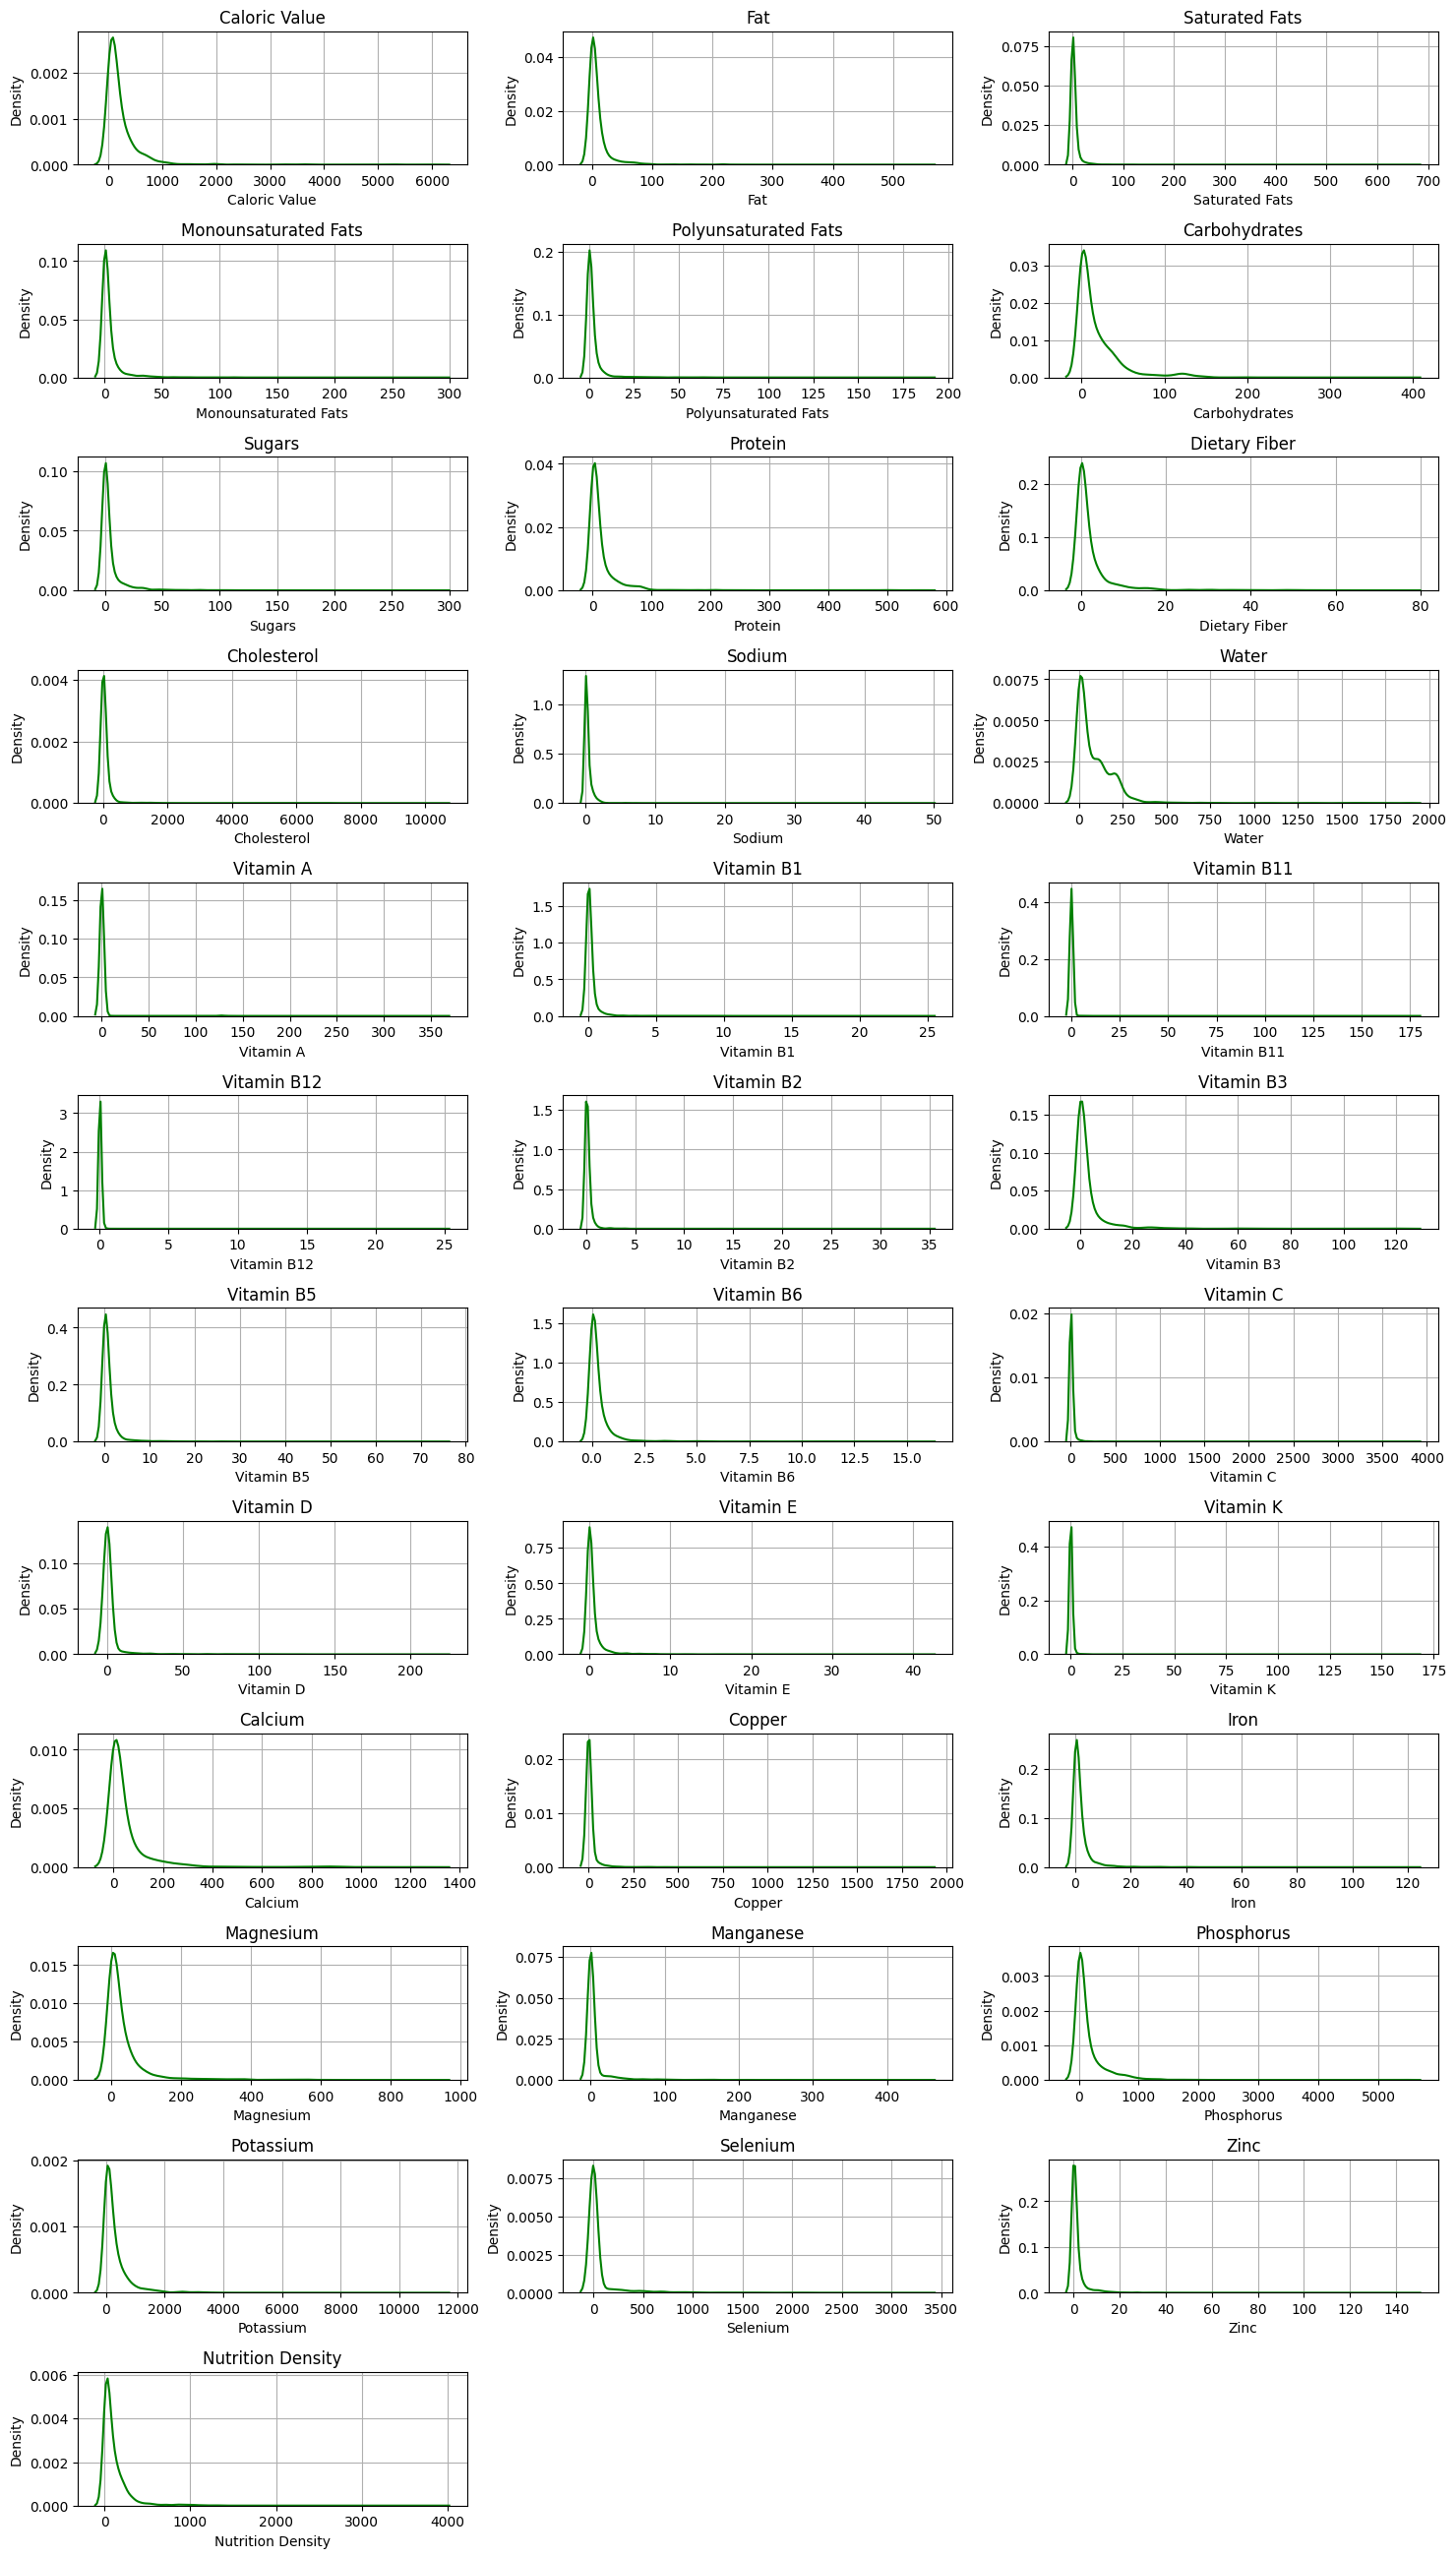

In [45]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(14, 3, i)
    sns.kdeplot(data[column], color="g")
    plt.title(column)
    plt.grid(True)
plt.tight_layout()
plt.show()

,food,Caloric Value
1437,goose meat raw,6077
1374,pork arm picnic raw,5298
1376,pork arm picnic cooked,5292
1430,duck meat raw,5123
1372,pork backfat,3683


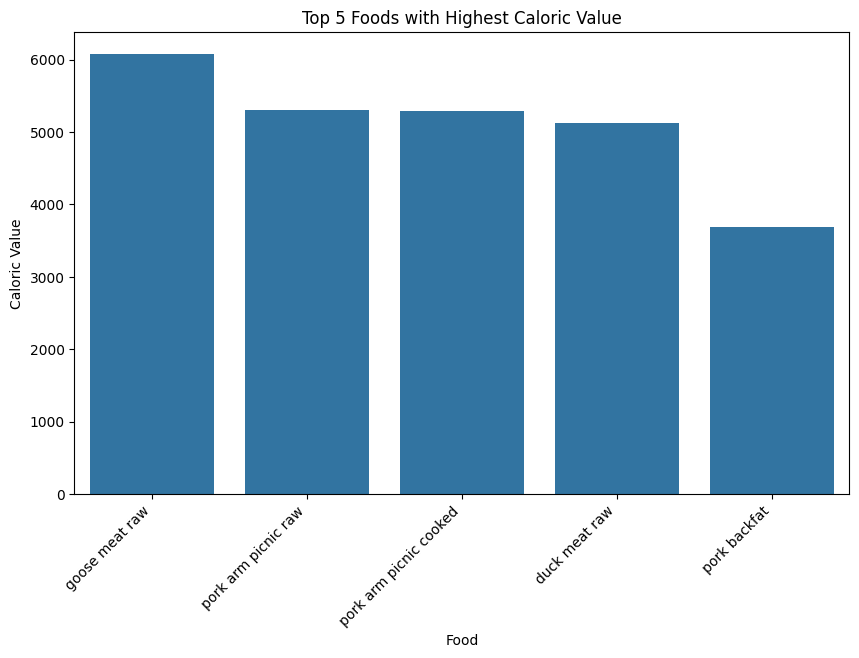

,food,Fat
1437,goose meat raw,550.7
1430,duck meat raw,498.8
1372,pork backfat,402.3
1374,pork arm picnic raw,343.4
1376,pork arm picnic cooked,322.7


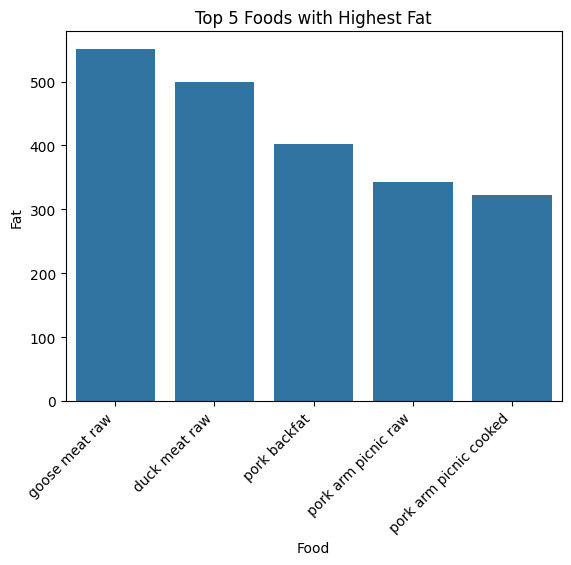

,food,Saturated Fats
999,coconut whole coconut,672.0
781,weetabix weetabix,396.1
1692,nutmeg butter oil,196.2
1710,babassu oil,177.0
1430,duck meat raw,167.6


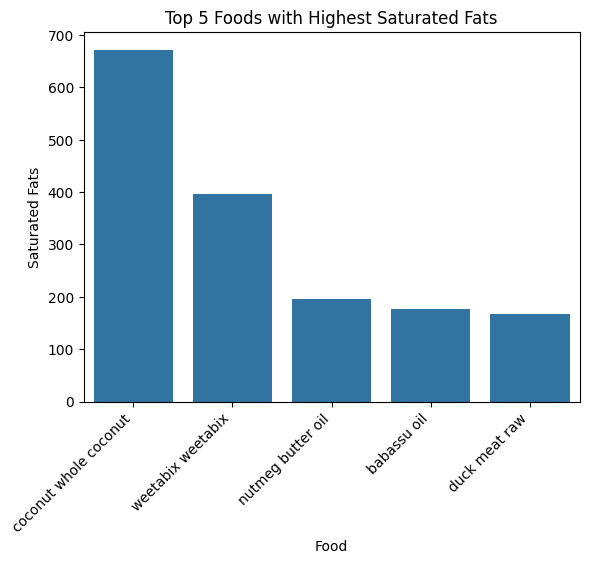

,food,Monounsaturated Fats
1437,goose meat raw,291.1
1430,duck meat raw,237.0
1372,pork backfat,190.3
1374,pork arm picnic raw,147.3
1376,pork arm picnic cooked,139.0


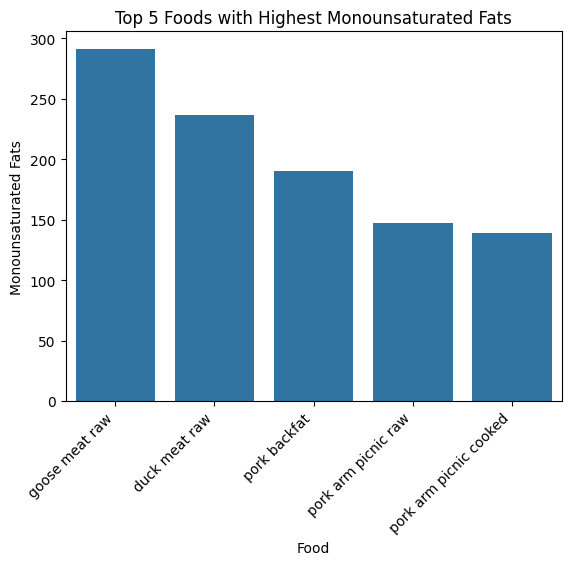

,food,Polyunsaturated Fats
815,honey cereali general mills,188.0
1721,tomatoseed oil,115.8
1676,menhaden fish oil,74.5
1374,pork arm picnic raw,67.9
1430,duck meat raw,64.4


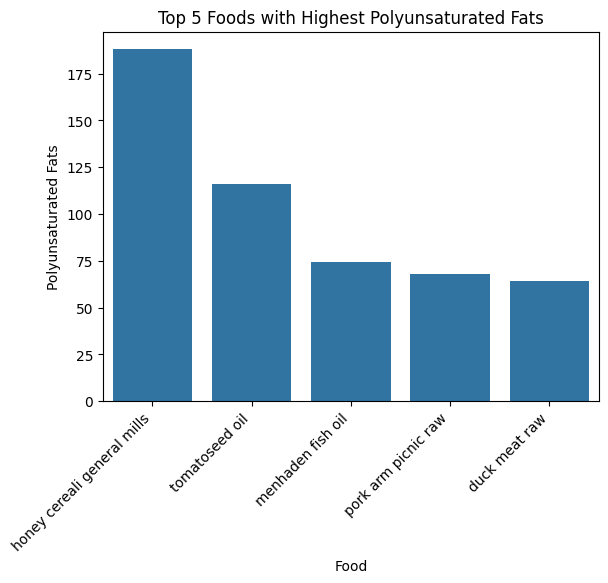

,food,Carbohydrates
707,banana cream pie,390.2
622,vanilla frosting,313.7
625,pineapple topping,225.8
616,white frosting dry,196.4
1925,potato chips fat free,190.1


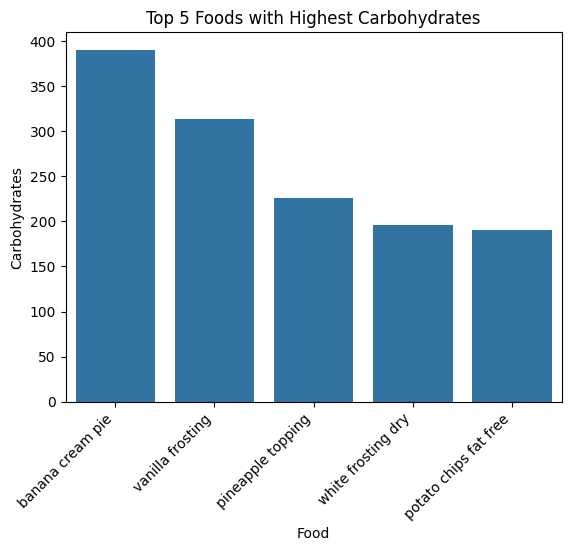

,food,Sugars
622,vanilla frosting,291.5
1466,danone low fat alsafi,255.0
707,banana cream pie,143.0
1968,cranberry sauce sweetened,105.0
2345,sweet potato canned,98.3


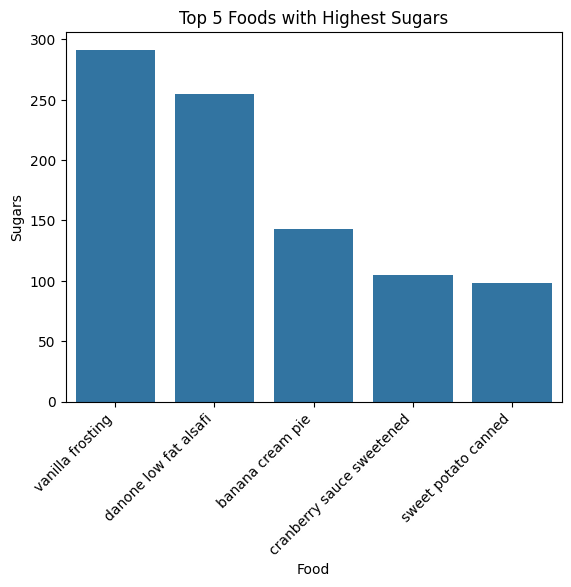

,food,Protein
1376,pork arm picnic cooked,560.3
1374,pork arm picnic raw,513.6
1438,turkey breast roasted,496.1
1406,turkey breast raw,495.6
1339,pork top loin roasts raw,468.4


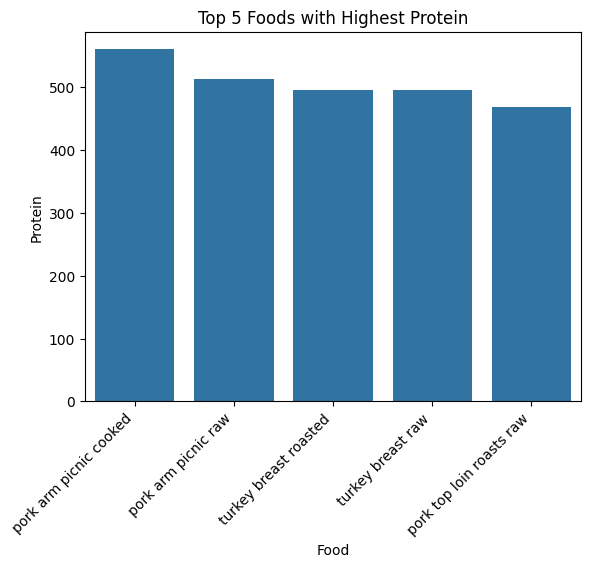

,food,Dietary Fiber
594,dessert wine dry,76.5
1109,lentils raw,58.6
1099,hyacinth beans raw,53.8
1086,navy beans raw,50.8
2235,split peas raw,50.2


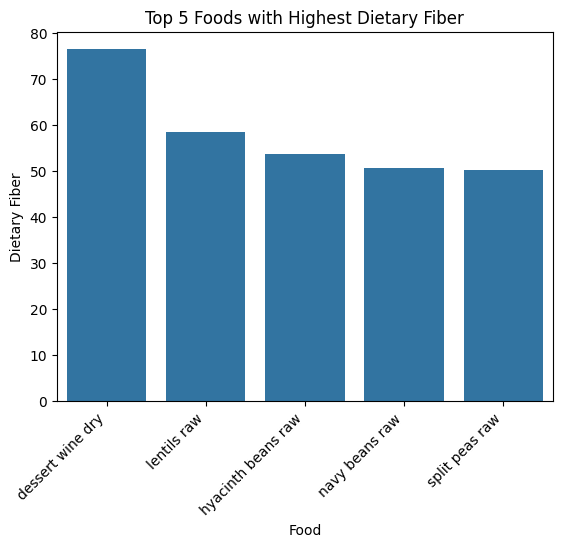

,food,Cholesterol
1294,veal brain cooked,10509.0
1320,pork brain cooked,9748.6
1323,lamb brain cooked,7089.2
1299,beef brain cooked,7002.5
1376,pork arm picnic cooked,1936.7


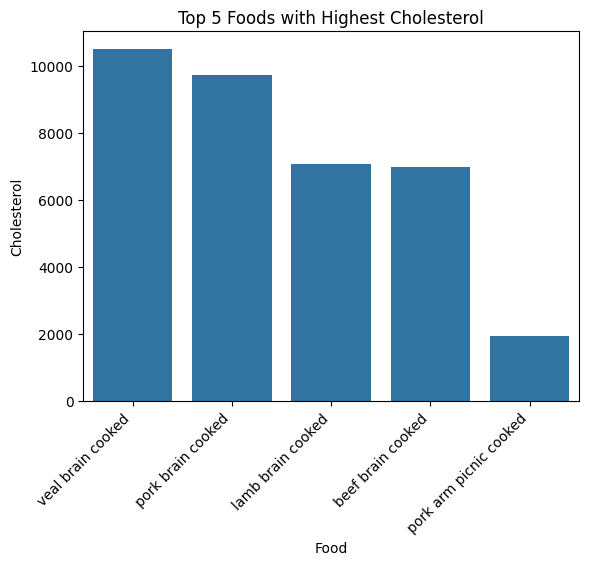

,food,Sodium
1943,adobo fresco,49.4
1047,salt,7.0
389,salt mackerel,6.1
370,jellyfish dried,5.6
1219,corned beef raw,5.5


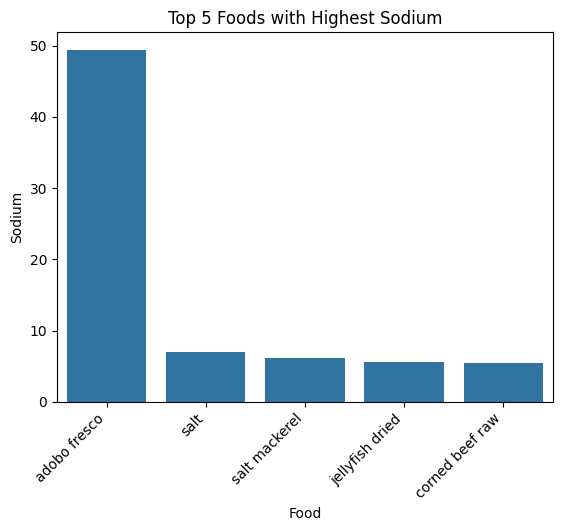

,food,Water
1374,pork arm picnic raw,1875.9
1406,turkey breast raw,1585.9
1339,pork top loin roasts raw,1539.6
1376,pork arm picnic cooked,1351.9
1438,turkey breast roasted,1092.4


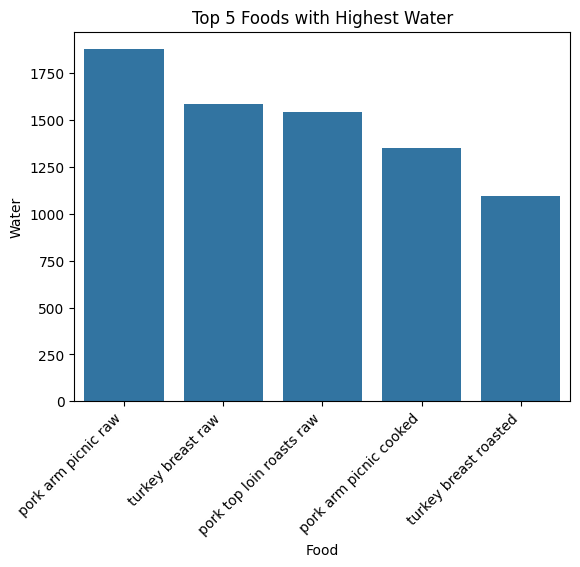

,food,Vitamin A
594,dessert wine dry,362.7
1091,hyacinth beans cooked,134.1
575,muller thurgau white wine,129.2
570,gamay red wine,128.6
593,semillon white wine,128.1


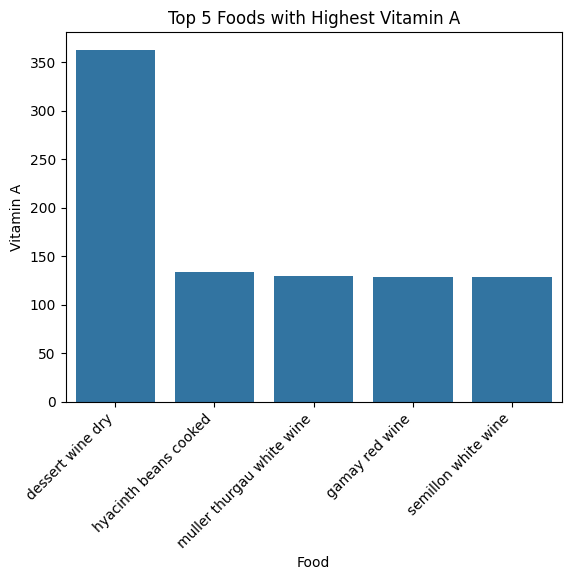

,food,Vitamin B1
1477,smoothie high protein creamy chocolate slimfast,25.0
1332,veal liver cooked,16.9
1374,pork arm picnic raw,16.1
1376,pork arm picnic cooked,9.9
1339,pork top loin roasts raw,9.4


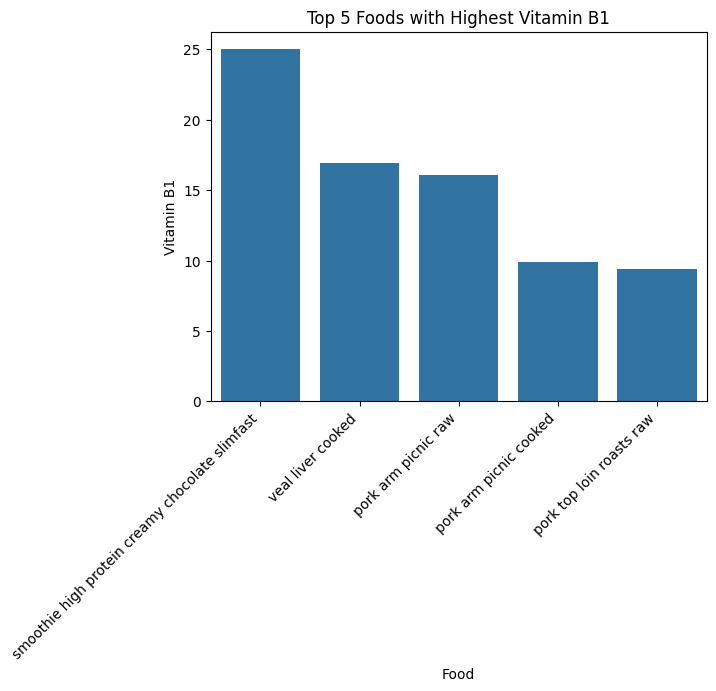

,food,Vitamin B11
1667,muesli with fruit nuts,177.6
1477,smoothie high protein creamy chocolate slimfast,100.0
1395,pork top loin roasts roasted,4.6
1385,pork centre rib roasts roasted,4.1
1389,pork backribs roasted,4.0


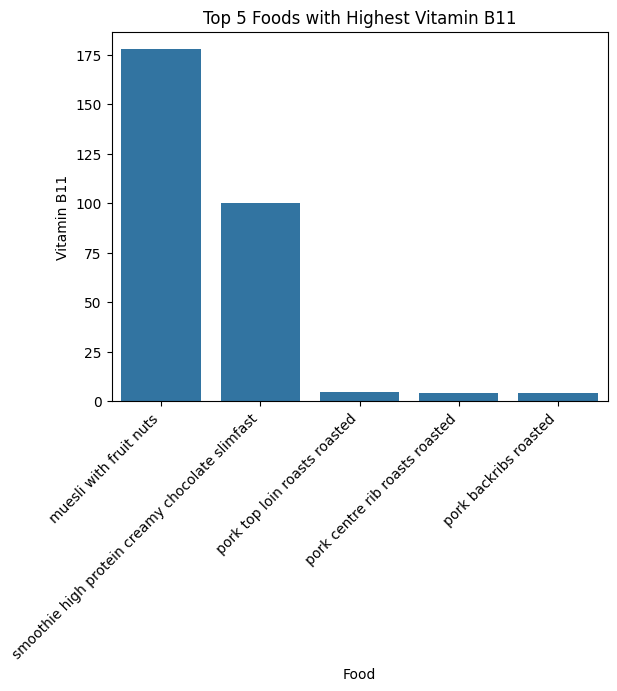

,food,Vitamin B12
1477,smoothie high protein creamy chocolate slimfast,25.0
1259,luncheon meat beef,0.5
1089,edamame cooked,0.5
1112,lentils cooked,0.4
1110,cranberry beans cooked,0.4


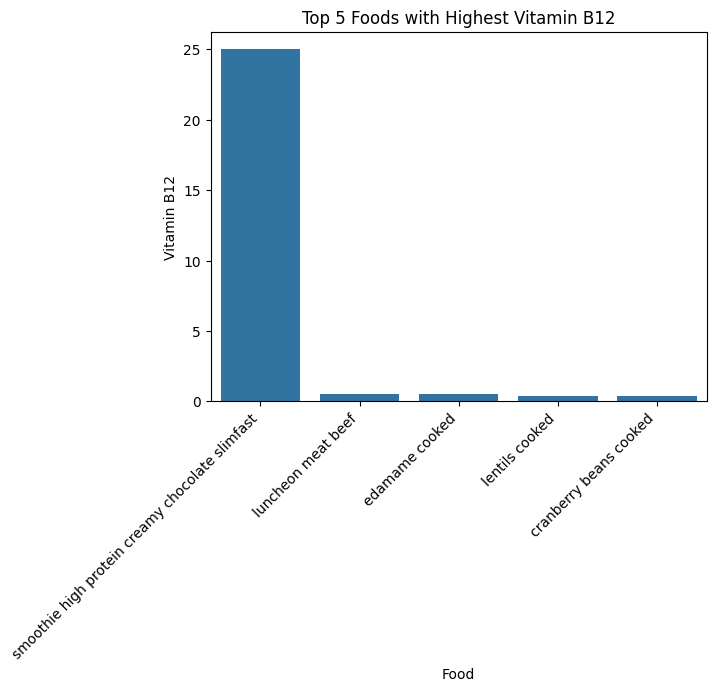

,food,Vitamin B2
1477,smoothie high protein creamy chocolate slimfast,35.0
1314,lamb liver cooked,13.5
1328,pork liver cooked,7.8
1376,pork arm picnic cooked,7.3
1374,pork arm picnic raw,6.8


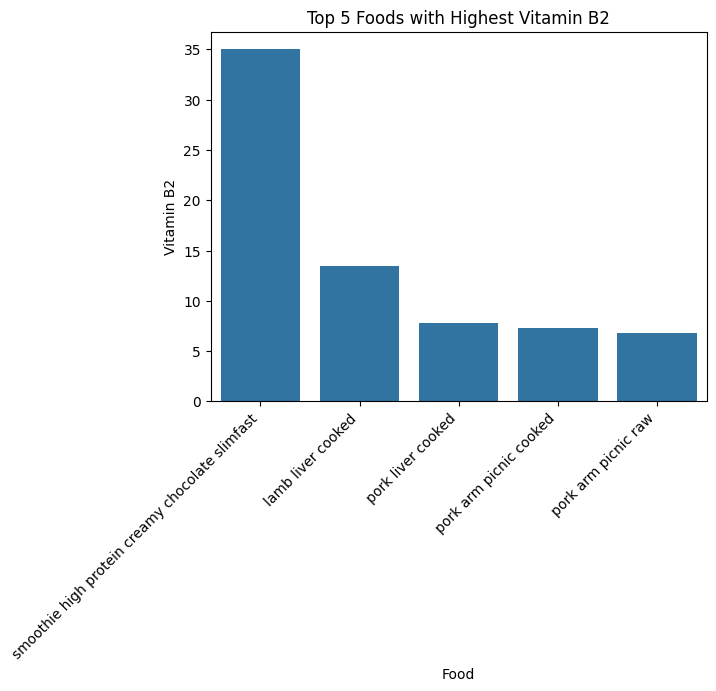

,food,Vitamin B3
1374,pork arm picnic raw,124.0
1339,pork top loin roasts raw,122.2
1376,pork arm picnic cooked,119.5
1406,turkey breast raw,117.7
1438,turkey breast roasted,110.0


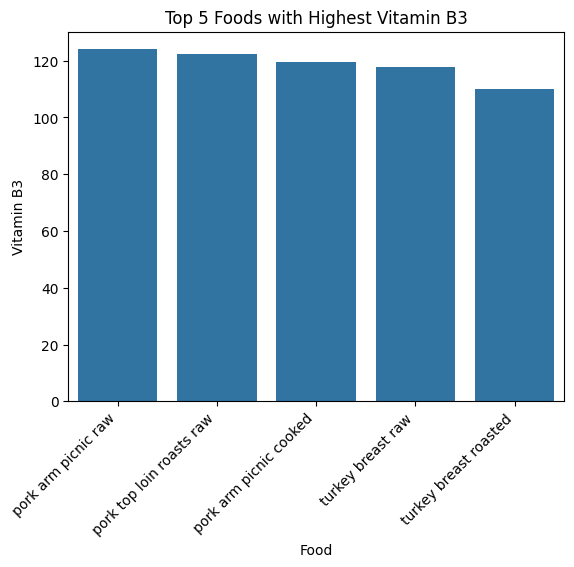

,food,Vitamin B5
1385,pork centre rib roasts roasted,74.3
1389,pork backribs roasted,67.0
1395,pork top loin roasts roasted,60.2
413,sockeye salmon cooked,31.4
1374,pork arm picnic raw,27.9


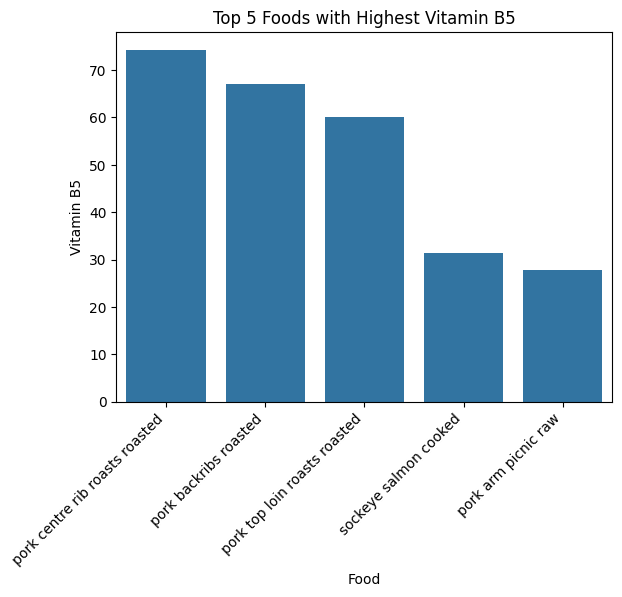

,food,Vitamin B6
1339,pork top loin roasts raw,15.8
1374,pork arm picnic raw,12.1
1385,pork centre rib roasts roasted,11.6
1389,pork backribs roasted,11.1
1406,turkey breast raw,10.9


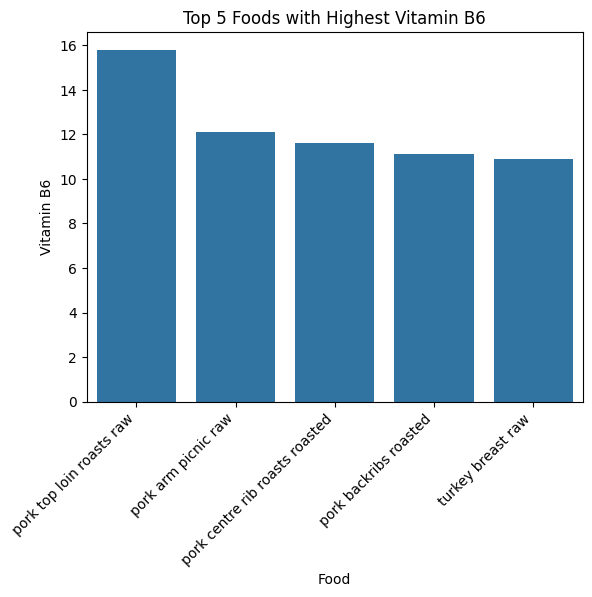

,food,Vitamin C
1543,acerola cherry juice,3872.0
902,rose hips,541.0
910,fruit walnut salad mcdonalds,383.6
1952,guava sauce cooked,348.4
2241,sweet yellow peppers,341.3


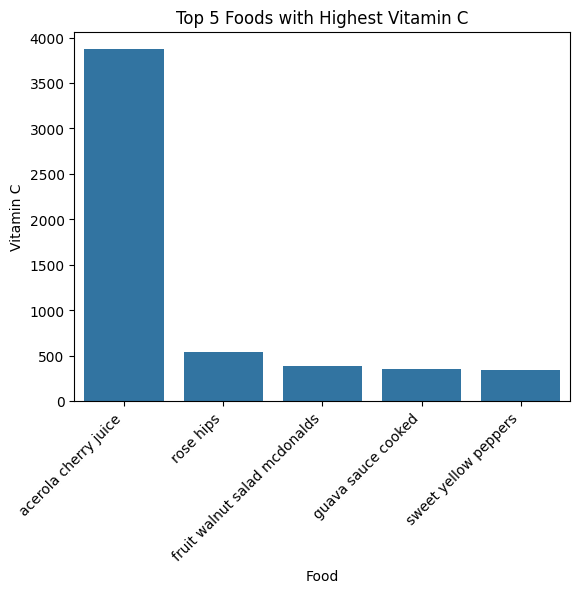

,food,Vitamin D
945,pokeberry shoots raw,217.6
2097,broccoli cooked,181.7
1581,tomato juice,170.3
2223,kohlrabi raw,164.3
923,guava,125.6


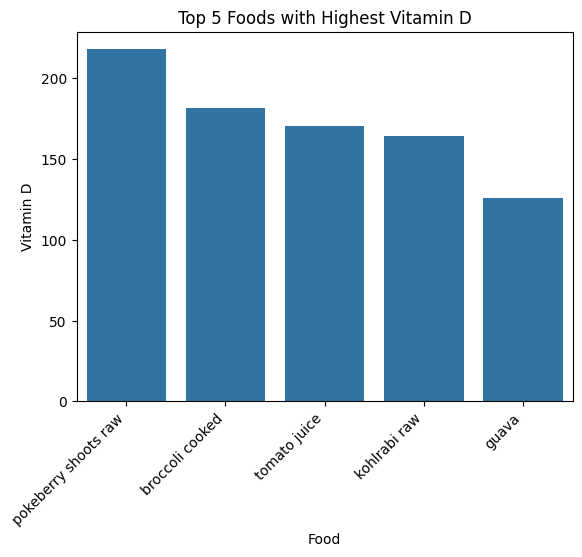

,food,Vitamin E
1710,babassu oil,41.6
632,almond paste,30.7
1722,wheat germ oil,20.3
1601,sunflower seeds dried,16.2
417,salmon raw,14.1


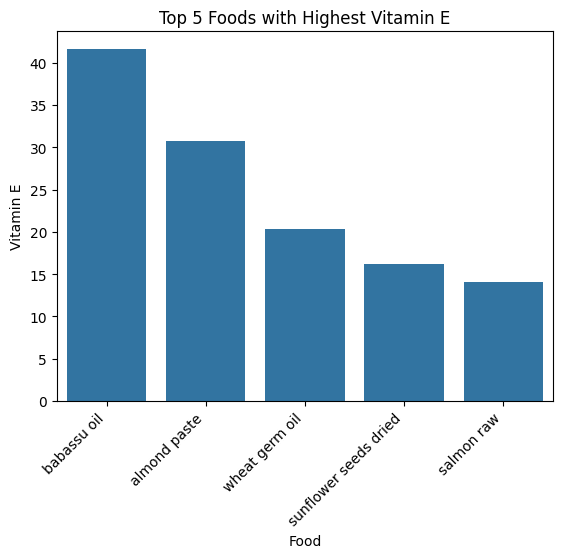

,food,Vitamin K
262,english muffin mcdonalds,166.4
1056,oregano dried,18.3
1068,thyme dried,7.5
2052,soymilk,6.1
1707,sunflower oil,5.6


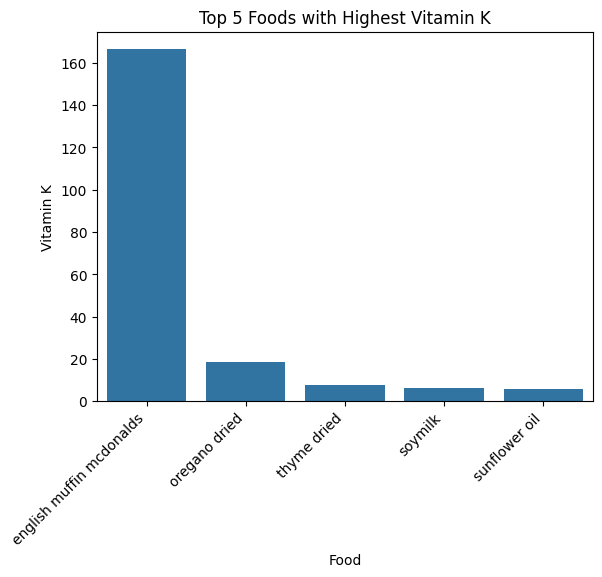

,food,Calcium
35,mexican cheese,1283.5
1634,sisymbrium seeds,1208.4
37,mozzarella cheese fat free,1085.9
38,provolone cheese,997.9
31,muenster cheese,946.4


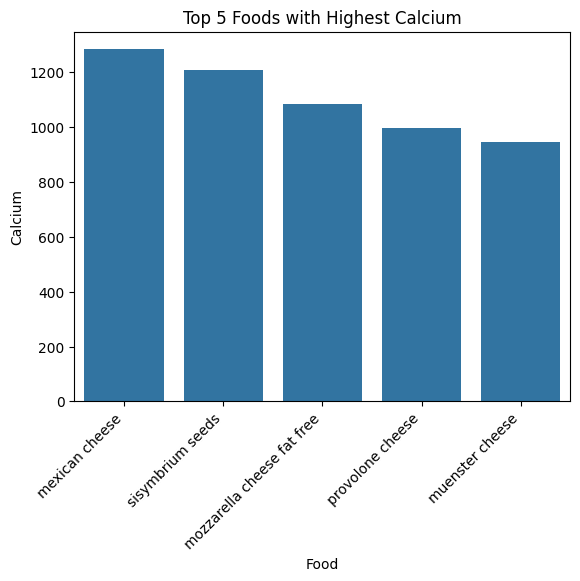

,food,Copper
1068,thyme dried,1890.0
1023,dill weed dried,1784.0
1056,oregano dried,1597.0
319,sandwich with cold cuts,668.6
71,enchilada with cheese,430.2


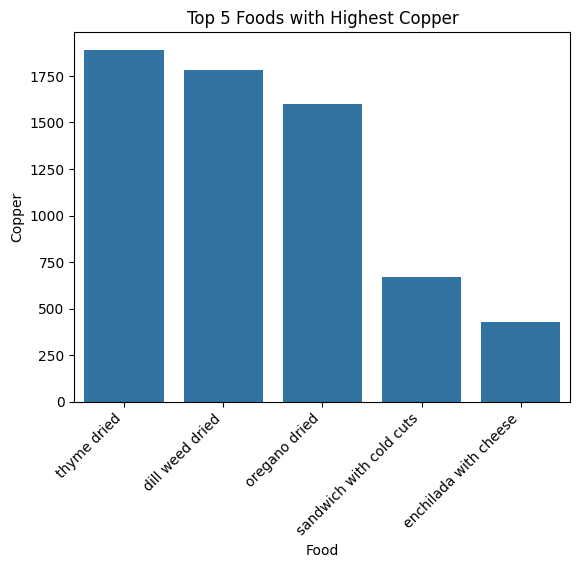

,food,Iron
1306,beef spleen cooked,121.2
1316,lamp spleen cooked,114.1
1358,pork splean cooked,66.5
1328,pork liver cooked,63.4
1333,pork lungs cooked,49.2


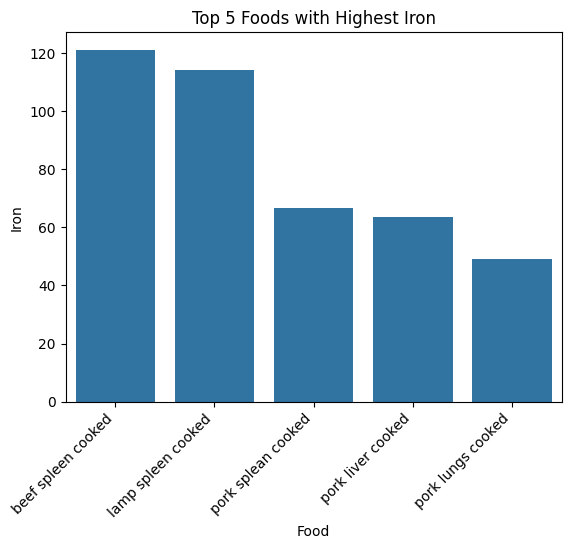

,food,Magnesium
775,rice bran,921.6
1599,pumpkin squash seeds dried,763.7
1126,mothbeans raw,746.8
774,cottonseed kernels roasted,655.6
1099,hyacinth beans raw,594.3


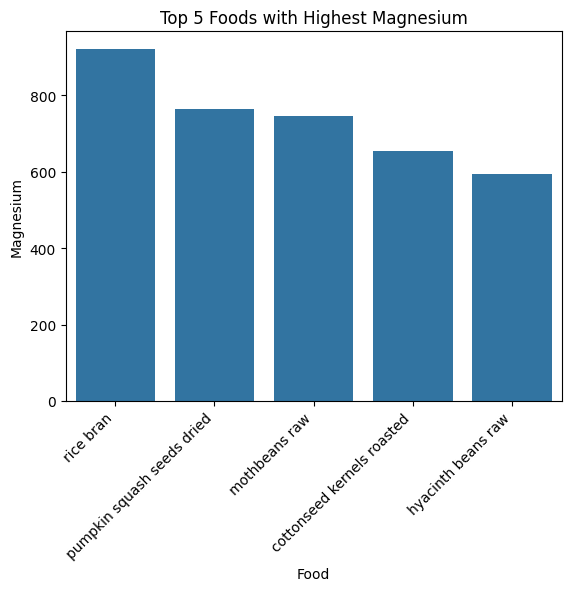

,food,Manganese
1023,dill weed dried,451.0
1056,oregano dried,270.0
808,kamut raw,249.2
1068,thyme dried,220.0
1395,pork top loin roasts roasted,212.0


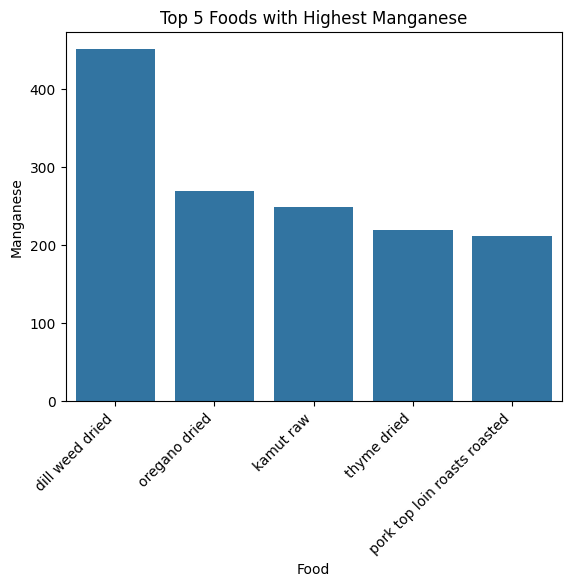

,food,Phosphorus
1374,pork arm picnic raw,5490.0
1376,pork arm picnic cooked,5404.8
1339,pork top loin roasts raw,4741.2
1406,turkey breast raw,4211.0
1437,goose meat raw,3832.9


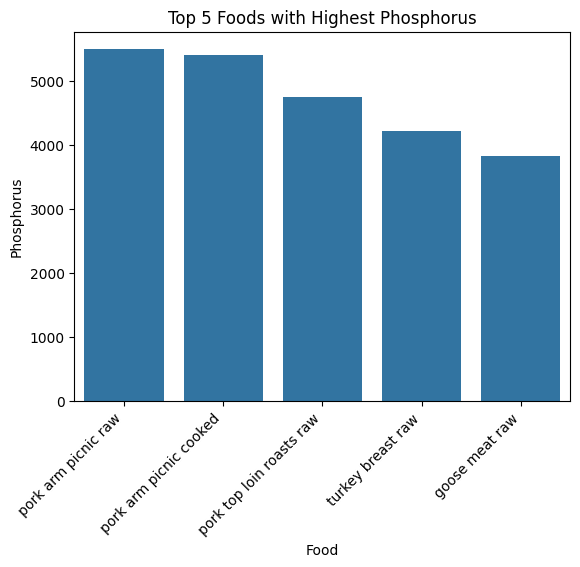

,food,Potassium
1374,pork arm picnic raw,11336.9
1376,pork arm picnic cooked,8039.6
1339,pork top loin roasts raw,7858.1
1406,turkey breast raw,6226.0
1437,goose meat raw,5045.0


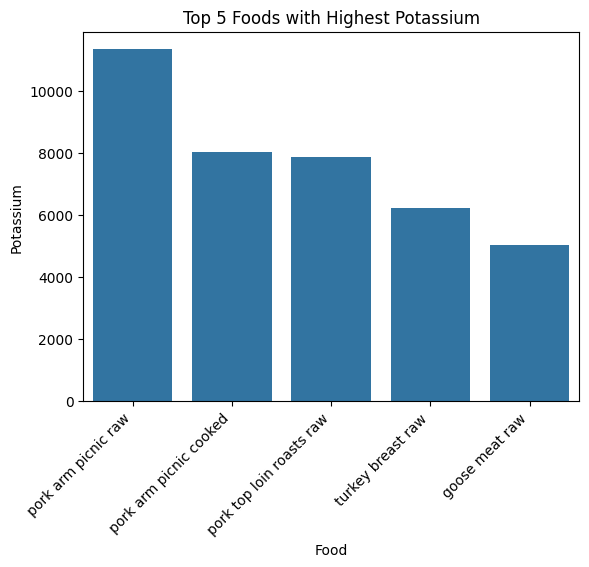

,food,Selenium
1023,dill weed dried,3308.0
1395,pork top loin roasts roasted,2959.5
1385,pork centre rib roasts roasted,2129.8
1389,pork backribs roasted,2107.2
1435,ground chicken cooked,1699.3


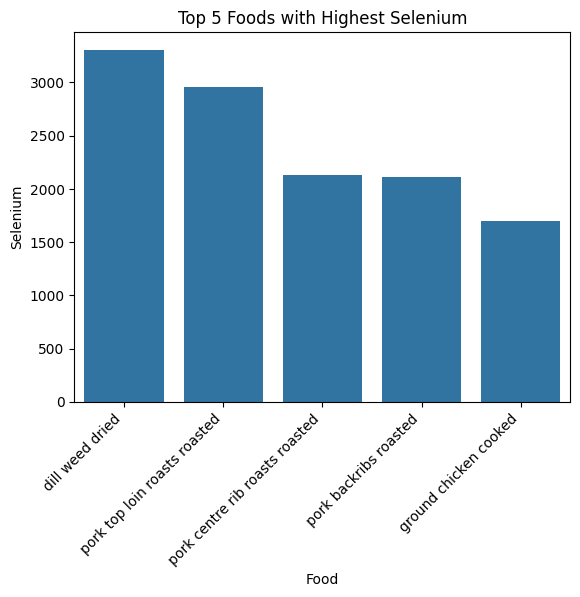

,food,Zinc
501,eastern oyster canned,147.3
1376,pork arm picnic cooked,69.8
1374,pork arm picnic raw,59.0
1214,beef under blade steak raw,42.9
1339,pork top loin roasts raw,38.0


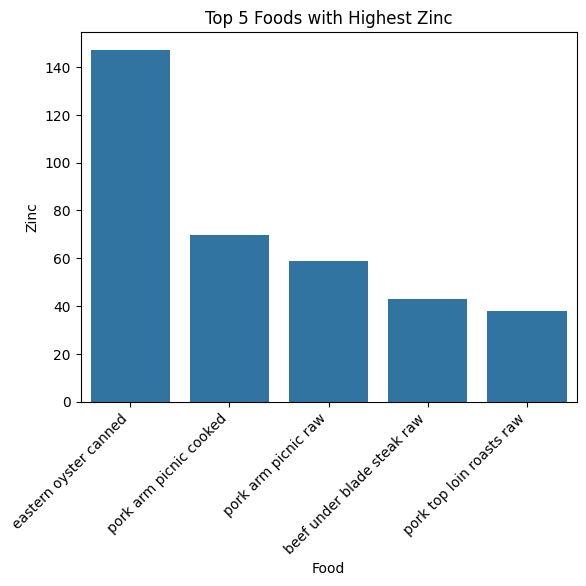

,food,Nutrition Density
1543,acerola cherry juice,3911.400
707,banana cream pie,1533.500
35,mexican cheese,1337.000
1634,sisymbrium seeds,1286.643
1376,pork arm picnic cooked,1264.074


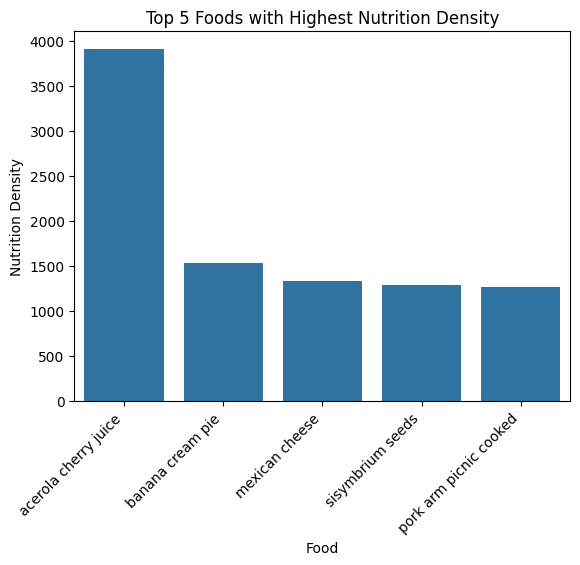

In [49]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(columns_to_plot, 1):
    temp_df = data.sort_values(by=column, ascending=False).head(5)[["food", column]]
    display(temp_df)
    sns.barplot(data=temp_df, x="food", y=column)
    plt.xticks(rotation=45,ha='right',fontsize=10)
    plt.xlabel("Food", fontsize=10)
    plt.ylabel(column, fontsize=10)
    plt.title(f"Top 5 Foods with Highest {column}", fontsize=12)
    plt.show()


## Correlation Between Carbohydrates and Sugar

<Axes: xlabel='Carbohydrates', ylabel='Sugars'>

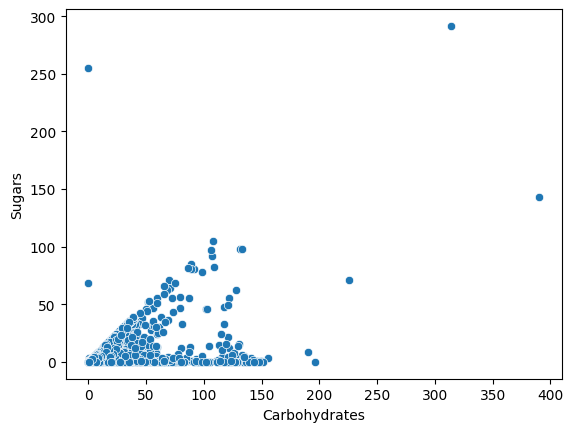

In [92]:
sns.scatterplot(x=data['Carbohydrates'],y=data['Sugars'])

## Top 10 Foods with Low Carbs and High Sugar

In [99]:
high_carbs_low_sugars = data.sort_values(by='Carbohydrates', ascending=False).head(5)[["food", 'Carbohydrates', 'Sugars']]
high_carbs_low_sugars = high_carbs_low_sugars.sort_values(by='Sugars', ascending=True).head(10)[["food", 'Carbohydrates', 'Sugars']]
high_carbs_low_sugars

,food,Carbohydrates,Sugars
616,white frosting dry,196.4,0.0
1925,potato chips fat free,190.1,8.4
625,pineapple topping,225.8,71.4
707,banana cream pie,390.2,143.0
622,vanilla frosting,313.7,291.5


## Correlation Between Protein and Dietary Fiber

In [102]:
data[['Protein', 'Dietary Fiber']].corr()

,Protein,Dietary Fiber
Protein,1.000000,0.031205
Dietary Fiber,0.031205,1.000000


<Axes: xlabel='Protein', ylabel='Dietary Fiber'>

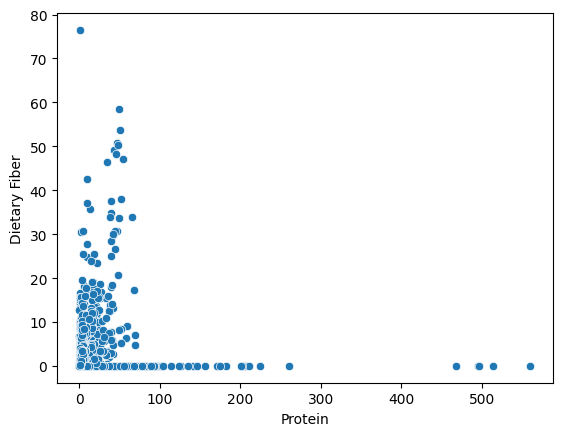

In [104]:
sns.scatterplot(x=data['Protein'],y=data['Dietary Fiber'])

## Top 5 Foods with High Protein to fiber ratio

In [107]:
data['Protein_to_Fiber_Ratio'] = data['Protein'] / data['Dietary Fiber']
data['Protein_to_Fiber_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['Protein_to_Fiber_Ratio'].fillna(0, inplace=True)

highest_protein_to_fiber_ratio = data.sort_values(by='Protein_to_Fiber_Ratio', ascending=False).head(10)[['food', 'Protein', 'Dietary Fiber', 'Protein_to_Fiber_Ratio']]
highest_protein_to_fiber_ratio

,food,Protein,Dietary Fiber,Protein_to_Fiber_Ratio
496,sardines in tomato sauce canned,18.6,0.009,2066.666667
34,pimento cheese,31.0,0.100,310.000000
1626,studentenfutter alnatura,3.1,0.031,100.000000
1420,chicken drumstick fried,15.8,0.200,79.000000
1244,turkey pastrami,4.6,0.062,74.193548
90,english muffin with egg cheese sausage,22.1,0.300,73.666667
1413,chicken leg fried,34.4,0.500,68.800000
1965,teriyaki sauce,1.1,0.016,68.750000
63,bagel with ham egg cheese,26.7,0.400,66.750000
156,biscuit with egg sausage,18.0,0.300,60.000000


## Correlation Between Vitamins and Caloric Value

In [110]:
col=['Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2',
       'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D',
       'Vitamin E', 'Vitamin K','Caloric Value']
data[col].corr().tail(3)

,Vitamin A,Vitamin B1,Vitamin B11,Vitamin B12,Vitamin B2,Vitamin B3,Vitamin B5,Vitamin B6,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Caloric Value
Vitamin E,-0.018143,0.109316,0.006949,-0.010504,0.063756,0.182499,0.042253,0.109561,0.020001,-0.049089,1.000000,-0.012177,0.270989
Vitamin K,-0.003059,-0.010084,-0.000557,0.008981,0.051038,-0.017208,0.028991,0.012202,-0.004041,0.033950,-0.012177,1.000000,-0.006541
Caloric Value,0.012179,0.391420,0.008006,-0.002386,0.305870,0.693851,0.467535,0.614840,-0.002313,-0.059747,0.270989,-0.006541,1.000000


## Top 10 Foods with Low Cholesterol and High Sodium

In [113]:
high_sodium = data.sort_values(by='Sodium', ascending=False).head(10)[["food",'Sodium','Cholesterol']]
high_sodium_low_cholesterol = high_sodium.sort_values(by='Cholesterol', ascending=True)
high_sodium_low_cholesterol

,food,Sodium,Cholesterol
1943,adobo fresco,49.4,0.0
1047,salt,7.0,0.0
848,rice pilaf raw,2.7,0.0
370,jellyfish dried,5.6,2.9
854,white rice pasta raw,3.0,3.3
389,salt mackerel,6.1,129.2
1219,corned beef raw,5.5,244.9
1382,pork blade roll roasted,3.7,251.9
1393,pork feet pickled,4.3,376.5
707,banana cream pie,2.8,604.9


## Top 10 Foods with High Iron and High Calcium

In [116]:
high_iron = data.sort_values(by='Iron', ascending=False).head(10)[["food",'Iron','Calcium']]
high_iron_high_calcium= high_iron.sort_values(by='Calcium', ascending=False)
high_iron_high_calcium

,food,Iron,Calcium
1437,goose meat raw,41.0,196.6
1430,duck meat raw,30.4,139.5
1325,lamb kidneys cooked,31.6,45.9
1358,pork splean cooked,66.5,38.9
1316,lamp spleen cooked,114.1,38.4
1306,beef spleen cooked,121.2,37.0
1328,pork liver cooked,63.4,35.4
1277,emu drums cooked,30.2,25.0
1333,pork lungs cooked,49.2,24.0
785,oat bran raw,40.0,18.0


## Top 10 Foods with High Zinc and High Vitamin C

In [119]:
high_zinc = data.sort_values(by='Zinc', ascending=False).head(10)[["food",'Zinc','Vitamin C']]
high_zinc_high_vitamin_C= high_zinc.sort_values(by='Vitamin C', ascending=False)
high_zinc_high_vitamin_C

,food,Zinc,Vitamin C
1437,goose meat raw,28.2,68.8
501,eastern oyster canned,147.3,8.1
1376,pork arm picnic cooked,69.8,0.0
1374,pork arm picnic raw,59.0,0.0
1214,beef under blade steak raw,42.9,0.0
1339,pork top loin roasts raw,38.0,0.0
1406,turkey breast raw,35.5,0.0
1438,turkey breast roasted,35.1,0.0
1403,pork spareribs raw,32.4,0.0
1211,chuck eye steak raw,27.9,0.0


## Clustering Using K-Means

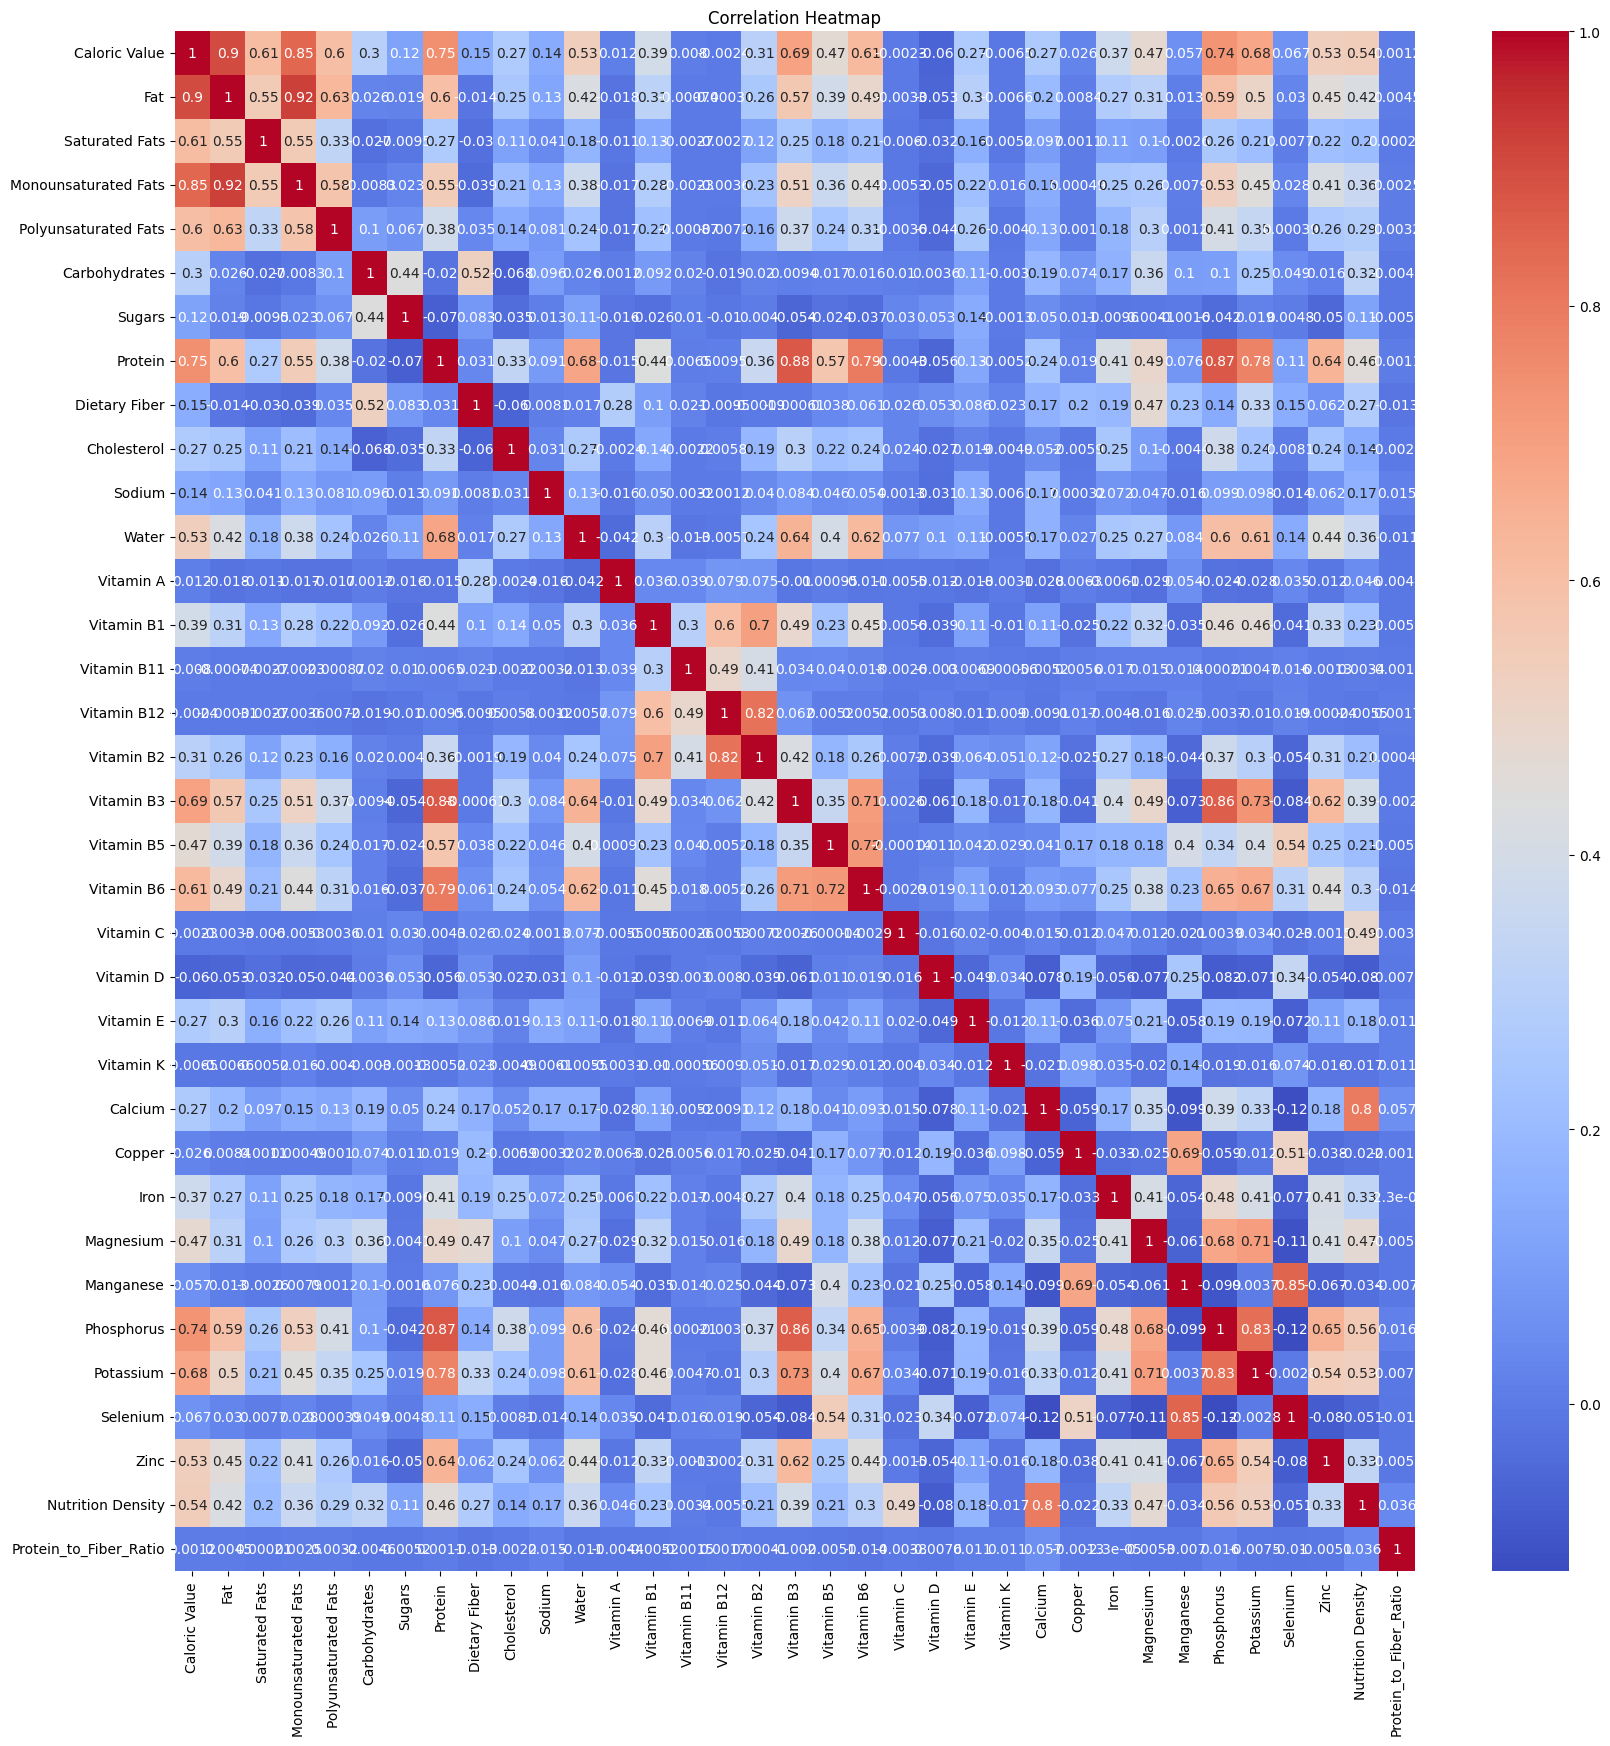

In [125]:
# Correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data.drop(columns=['food']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

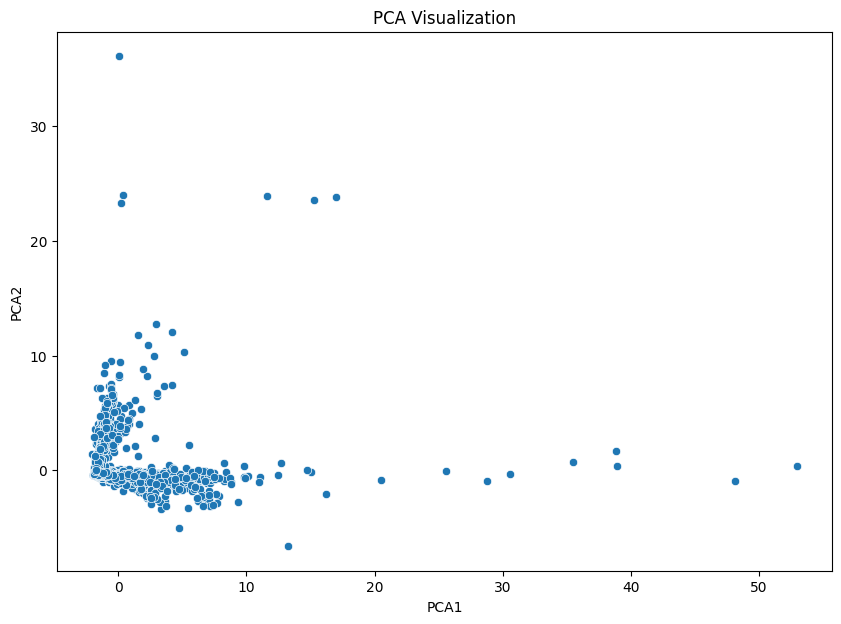

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['food']))

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to the dataframe
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

# Plot PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', data=data)
plt.title('PCA Visualization')
plt.show()


# K-Means 

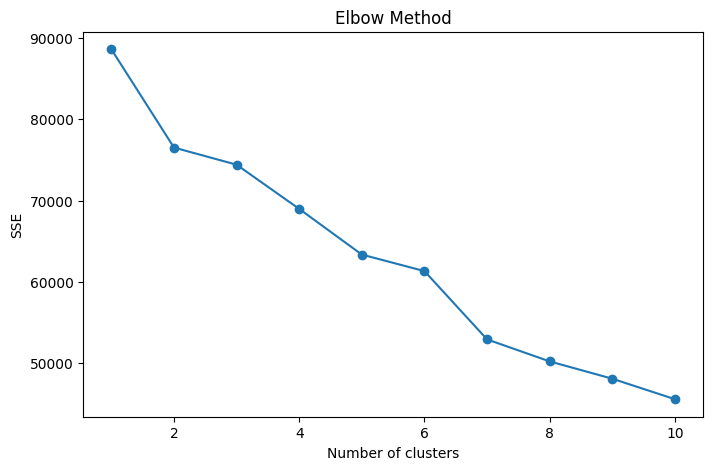

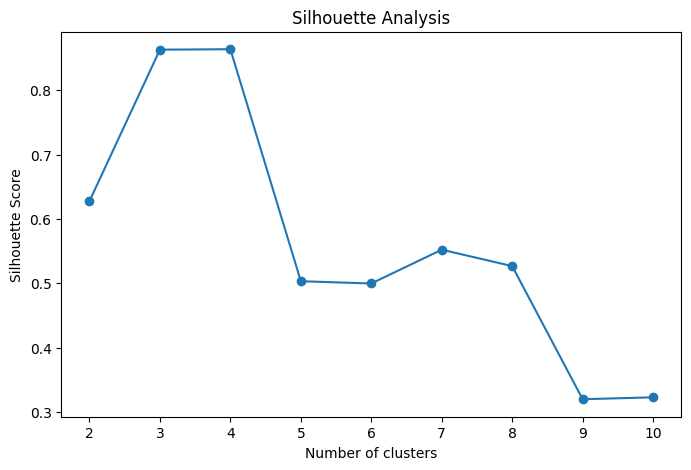

In [138]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Silhouette analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [153]:
# Fit K-means with 2 clusters (based on peak silhouette score)
optimal_k = 6  # Based on Silhouette analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_

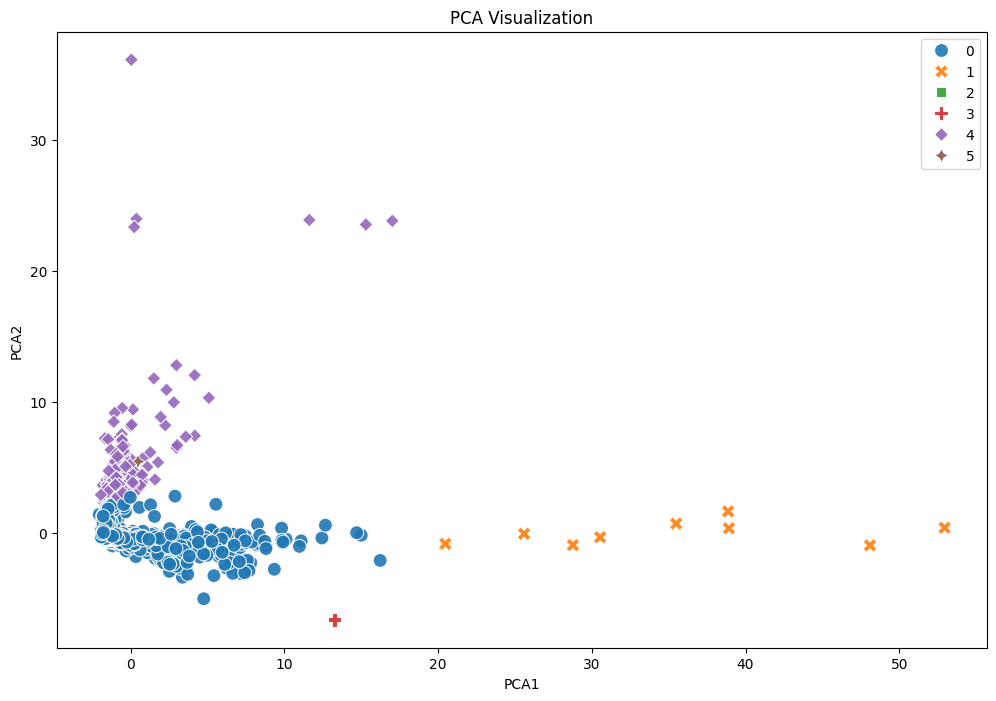

In [155]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='tab10', alpha=0.9, s=100, style='Cluster')

plt.title('PCA Visualization')
plt.legend(loc='best')
plt.show()